# Árboles de decisión

Los arboles de decisión son representaciones gráficas de posibles soluciones a una decisión basadas en ciertas condiciones, es uno de los algoritmos de aprendizaje supervisado más utilizados en machine learning y pueden realizar tareas de clasificación o regresión.

Los árboles de decisión tienen un primer nodo llamado ***raíz*** (root) y luego se descomponen el resto de atributos de entrada en dos ramas (podrían ser más) planteando una condición que puede ser cierta o falsa. Se bifurca cada nodo en 2 y vuelven a subdividirse hasta llegar a las ***hojas*** que son los nodos finales y que equivalen a respuestas a la solución: Si/No, Comprar/Vender, o lo que sea que se esté clasificando.

## ¿Cómo funcionan?

Para obtener el árbol óptimo y valorar cada subdivisión entre todos los árboles posibles y conseguir el nodo raiz y los subsiguientes, el algoritmo deberá medir, de alguna forma, las predicciones logradas y valorarlas para comparar de entre todas y obtener la mejor. Para medir y valorar, utiliza diversas funciones, siendo las más conocidas y usadas los ***Indice gini*** y ***Ganancia de información*** que utiliza la denominada ***entropía***. La división de nodos continuará hasta que llegar a la profundidad máxima posible del árbol o se limiten los nodos a una cantidad mínima de muestras en cada hoja. 

### Índice de gini
Se utiliza para atributos con valores continuos (precio de una casa). Esta función de coste mide el “grado de impureza” de los nodos, es decir, cuán desordenados o mezclados quedan los nodos una vez divididos. Se debe minimizar ese índice.

### Ganancia de información
Se utiliza para atributos categóricos (por ejemplo hombre/mujer). Este criterio intenta estimar la información que aporta cada atributo basado en la ***teoría de la información***. Para medir la aleatoriedad de incertidumbre de un valor aleatorio de una variable “X” se define la ***Entropia***.

Al obtener la medida de entropía de cada atributo, es posible calcular la ganancia de información del árbol. Se debe maximizar esta ganancia.

En este notebook se revisará el árbol de decisión para regresión.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_frame = pd.read_csv("turbines_df.csv")
data_frame.head()

,turbine_capacity,rotor_diameter_m,hub_height_m,commissioning_date,province_territory,model
0,150,23.0,30.0,1993,Alberta,Other
1,600,44.0,40.0,1997,Alberta,Other
2,600,44.0,50.0,1998,Alberta,Other
3,600,44.0,50.0,1998,Alberta,Other
4,600,44.0,50.0,1998,Alberta,Other


In [3]:
data_frame.shape

(6478, 6)

In [4]:
data_frame.dtypes

turbine_capacity        int64
rotor_diameter_m      float64
hub_height_m          float64
commissioning_date      int64
province_territory     object
model                  object
dtype: object

In [5]:
# Valores nulos
for feature in data_frame.columns:
    print('Total de valores nulos de', feature, '=', data_frame[feature].isna().sum())

Total de valores nulos de turbine_capacity = 0
Total de valores nulos de rotor_diameter_m = 0
Total de valores nulos de hub_height_m = 0
Total de valores nulos de commissioning_date = 0
Total de valores nulos de province_territory = 0
Total de valores nulos de model = 0


In [6]:
# Valores únicos
for feature in data_frame.columns:
    print('Valores únicos de', feature, '=', data_frame[feature].unique())

Valores únicos de turbine_capacity = [ 150  600  660 1300 1800 3000 1500  750 1600 2300 2310 2000 1700 2750
 3200 3750 1650 2350 3300   65  100  800 1200  900 2100 1990 1400 1680
 1900  650 2500 2221 2126 1620 2850 2050 2648 2483 1824 1903 2030 1880
  500 2772 2942 3450 2200]
Valores únicos de rotor_diameter_m = [ 23.    44.    47.    60.    40.    50.    80.    90.    77.    51.5
 100.    71.    82.5  101.   103.    82.   120.   114.   141.    92.
 126.    15.5   15.    48.    62.    70.    52.    54.    52.9   97.
 116.   110.    43.    93.    83.    99.8  113.    92.5  136.    48.25
 107.   117.  ]
Valores únicos de hub_height_m = [ 30.   40.   50.   46.   48.   47.   60.   65.   67.   75.   80.   85.
  54.   90.   78.   95.  110.  100.   99.   98.  117.   24.5  25.   64.
  69.   55.   92.   76.   99.5  96.   98.5 124.   92.5 132.   81.  101.
  84.   83.  116.5  73.   79.5  37. ]
Valores únicos de commissioning_date = [1993 1997 1998 2000 2001 2002 2003 2004 2006 2007 2009 2010 2011

In [7]:
# Medidas estadísticas
data_frame.describe()

,turbine_capacity,rotor_diameter_m,hub_height_m,commissioning_date
count,6478.000000,6478.000000,6478.000000,6478.000000
mean,1967.307194,88.203520,82.790908,2011.019142
std,605.933839,16.566686,14.366232,4.340453
min,65.000000,15.000000,24.500000,1993.000000
25%,1600.000000,77.000000,80.000000,2009.000000
50%,1880.000000,90.000000,80.000000,2012.000000
75%,2300.000000,100.000000,85.000000,2014.000000
max,3750.000000,141.000000,132.000000,2019.000000


In [8]:
# Considerando solo las columnas de tipo object
import numpy as np
data_frame.describe(include=[np.object])

,province_territory,model
count,6478,6478
unique,11,11
top,Ontario,Other
freq,2443,2789


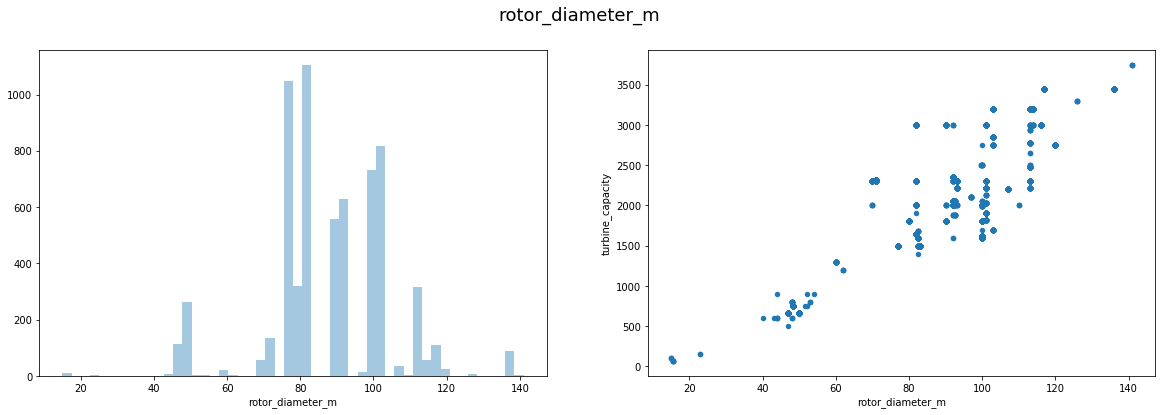

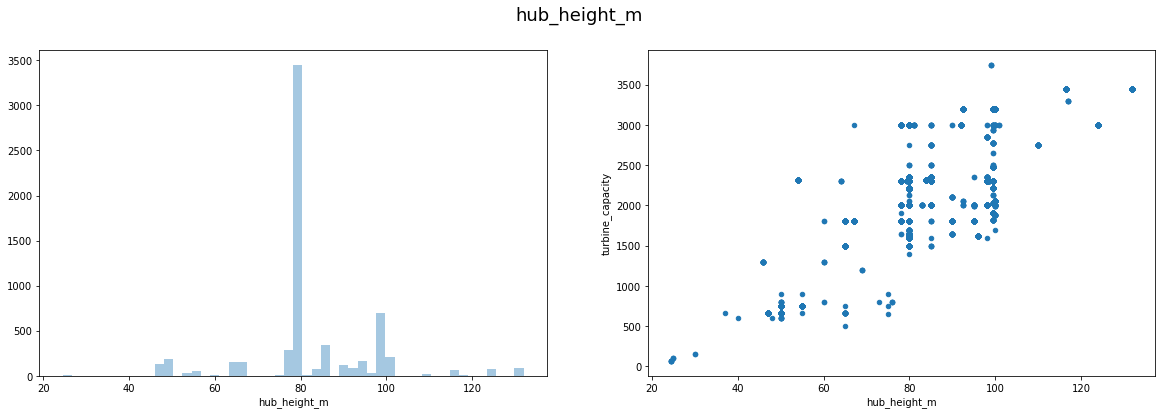

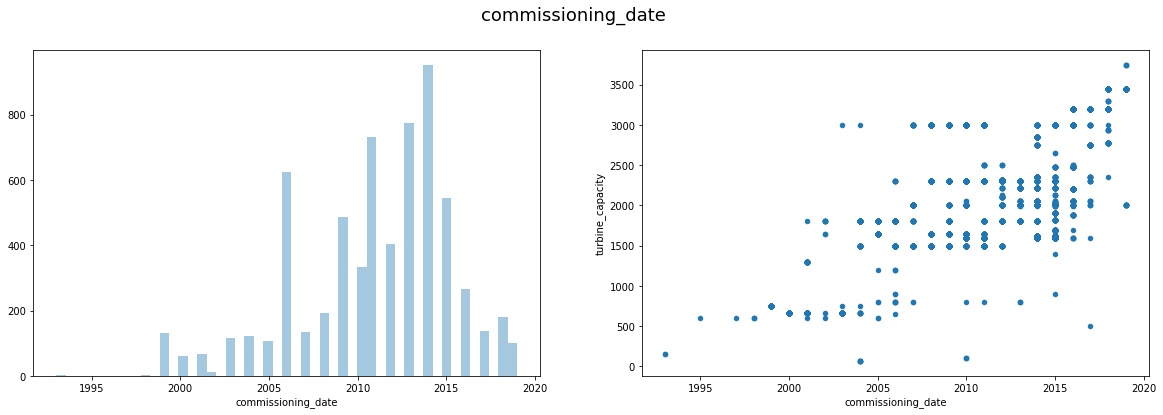

In [9]:
for col in ['rotor_diameter_m','hub_height_m', 'commissioning_date']:
    fig, ax =plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(col, fontsize=18)
    sns.distplot(data_frame[col], ax=ax[0], kde=False)
    data_frame[[col]+['turbine_capacity']].plot.scatter(x=col, y='turbine_capacity', ax=ax[1])
    plt.show()

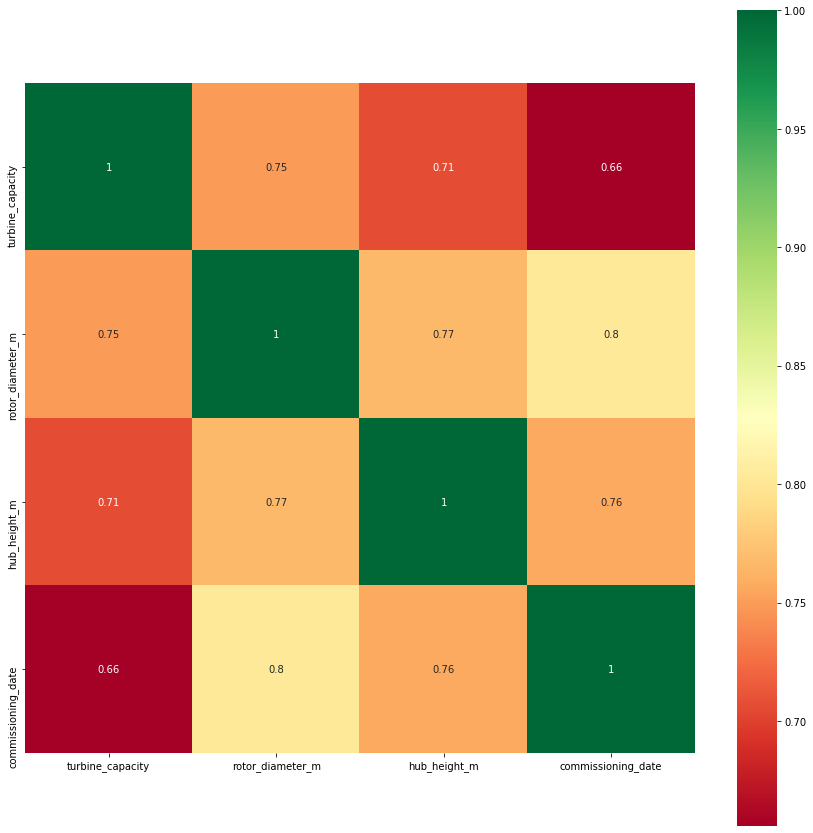

In [10]:
## Correlación de las variables
plt.figure(figsize=(15,15))
p=sns.heatmap(data_frame.corr(), annot=True,cmap='RdYlGn',square=True)

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X = data_frame[['rotor_diameter_m','hub_height_m']] 
y = data_frame.turbine_capacity

# Separar los datos de "train" en entrenamiento y prueba para probar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)
modelo = DecisionTreeRegressor(max_depth = 5, random_state = 29)

# Entrenamiento del modelo
modelo.fit(X_train, y_train)

# Validación del modelo
Y_pred = modelo.predict(X_test)

# Evaluación del modelo
print('Precisión del modelo (en entrenamiento):', modelo.score(X_train, y_train))
print('Precisión del modelo (en validación):', modelo.score(X_test, y_test))

Precisión del modelo (en entrenamiento): 0.8249428738688777
Precisión del modelo (en validación): 0.83418586620569


## Representación gráfica del árbol

Profundidad del árbol: 5
Número de nodos terminales: 26


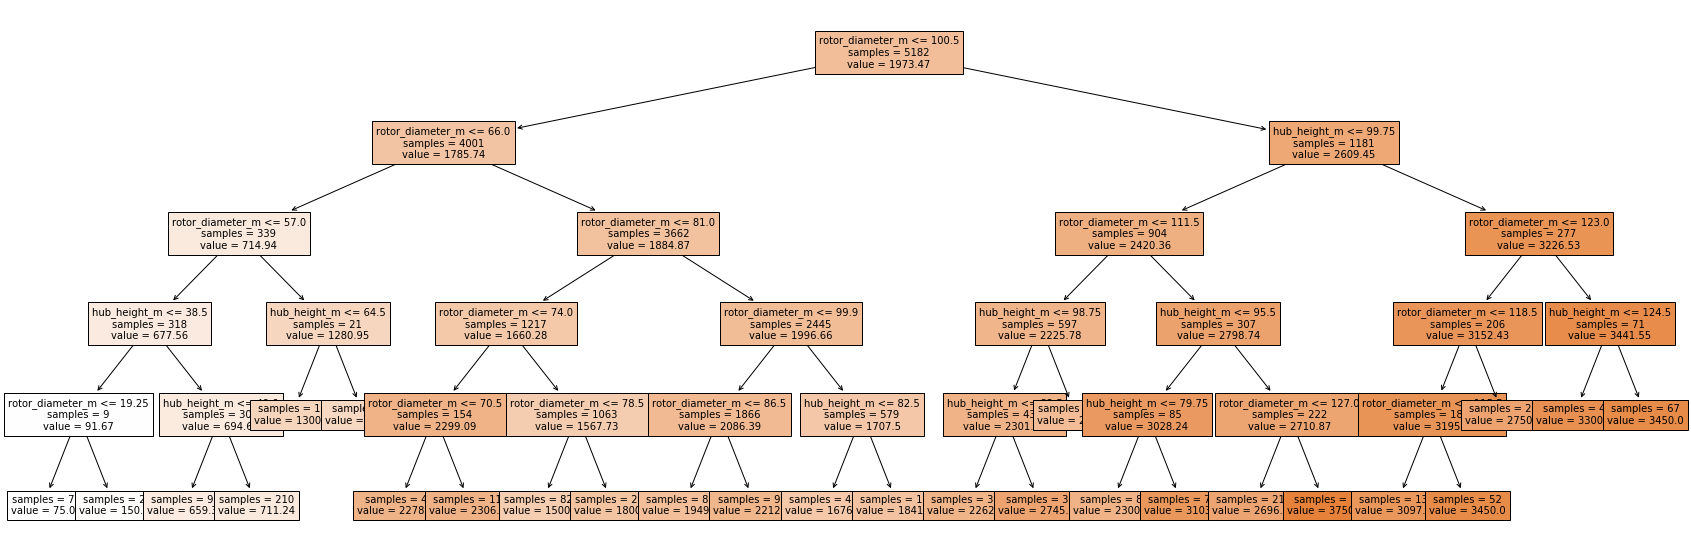

In [12]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(30, 10))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = data_frame.drop(columns = ["province_territory", "model", "turbine_capacity"]).columns,
            class_names   = 'turbine_capacity',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )